# feat

# Standardization
Xi= Xi-mean/SD

in this, 
the transformed values will have
mean=0 and SD=1

# Normalization

technique to change numeric column into dataset of a common scale.

types:
min max scaling  
    Xi' = Xi-Xmin/ Xmax-Xmin
    0<=value<=1
    mostly when we know min and max value
    eg.- image processing
    
mean normlizn
    Xi' = Xi-Xmean/ Xmax-Xmin
    -1<=value<=1
    useful in centered data algos
    
maX absolute scaling
    Xi= Xi/|Xmax|
    used in sparce data(contain a lot of 0's)
    
robust scaling
    Xi=Xi-Xmedian/IQR   IQR={75th percentile value - 25th per.val}
    if data has a lot of outlayers

In [5]:
import matplotlib

In [12]:
import pandas as pd
import seaborn as sns

In [16]:
df=pd.read_csv("wine.csv", usecols=[0,1,2])
df

,Wine,Alcohol,Malic.acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_16860\3372989474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Alcohol'])


<Axes: xlabel='Alcohol', ylabel='Density'>

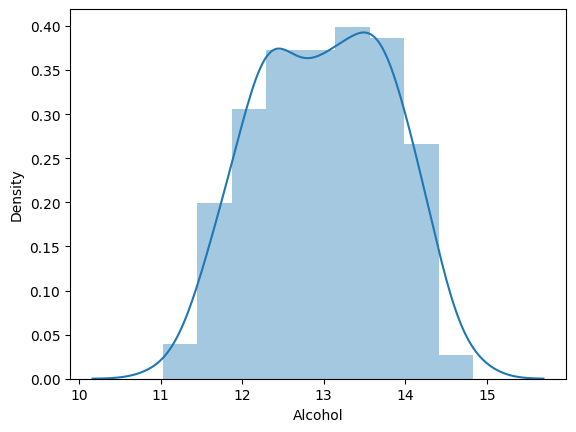

In [17]:
sns.distplot(df['Alcohol'])

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_16860\2095784071.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Malic.acid'])


<Axes: xlabel='Malic.acid', ylabel='Density'>

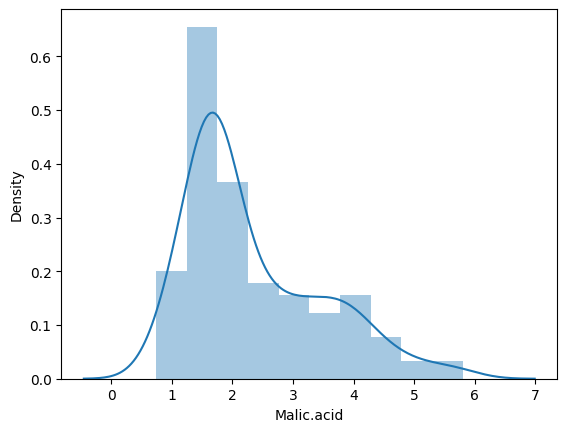

In [18]:
sns.distplot(df['Malic.acid'])

<Axes: xlabel='Alcohol', ylabel='Malic.acid'>

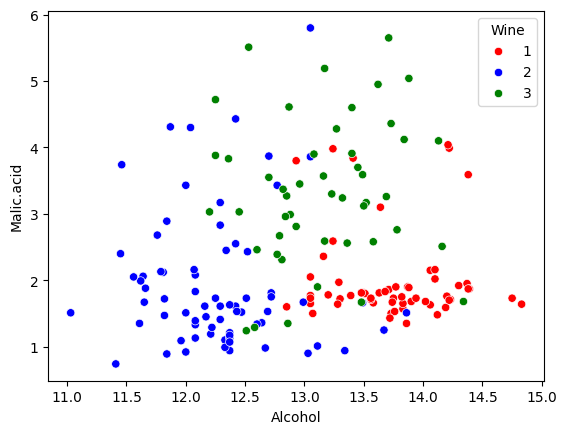

In [27]:
sns.scatterplot(x=df['Alcohol'],y=df['Malic.acid'], hue=df['Wine'], palette={1:'red', 2:'blue', 3:'green'})

In [34]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Wine', axis=1),df['Wine'],test_size=0.3,random_state=0)
x_train.shape, x_test.shape

,Alcohol,Malic.acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51
...,...,...
103,11.82,1.72
67,12.37,1.17
117,12.42,1.61
47,13.90,1.68


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#fit train set
scaler.fit(x_train)

#transform
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_test_scaled

In [48]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns= x_test.columns)

In [52]:
import numpy as np
np.round(x_test_scaled.describe(),1)

,Alcohol,Malic.acid
count,54.0,54.0
mean,0.5,0.3
std,0.2,0.2
min,0.1,-0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


AttributeError: 'MinMaxScaler' object has no attribute 'score'